# Анализ тарифов сотовой связи компании "Мегалайн"

Задача проекта: анализ поведения клиентов, определение более выгодного тарифа для оператора.

<b>Тариф «Смарт»</b>
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.


<b>Тариф «Ультра»</b>
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

<b>Примечание:</b>
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

## Изучение данных из файла

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [121]:
df_calls = pd.read_csv('/Users/alena/Desktop/projects/Проект - выгодный тариф/calls.csv')
df_internet = pd.read_csv('/Users/alena/Desktop/projects/Проект - выгодный тариф/internet.csv', index_col=[0])
df_messages = pd.read_csv('/Users/alena/Desktop/projects/Проект - выгодный тариф/messages.csv')
df_tariffs = pd.read_csv('/Users/alena/Desktop/projects/Проект - выгодный тариф/tariffs.csv')
df_users = pd.read_csv('/Users/alena/Desktop/projects/Проект - выгодный тариф/users.csv')

In [122]:
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [123]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [124]:
df_internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [125]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [126]:
df_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [127]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [128]:
df_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [129]:
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [130]:
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [131]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


 ### Вывод

Таблица df_calls
- call_date - заменить тип данных на datetime
- duration - перевести в тип int


Таблица df_internet
- Unnamed: 0 - убрать столбец, тк он дублирует индексы
- session_date - заменить тип данных на datetime
- mb_used - перевести в тип int


Таблица df_messages
- message_date - заменить тип данных на datetime


Таблица df_tariffs
- Проблем не обнаружено


Таблица df_users
- churn_date - обработать пропуски
- reg_date - заменить тип данных на datetime


## Изменение типа данных, группировка

<b>Изменяем тип данных:</b>

In [132]:
#Переводим столбцы в формат даты
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y.%m.%d') 
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y.%m.%d')   
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y.%m.%d')                                            
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y.%m.%d') 

#Округляем продолжительность звонка
df_calls['duration'] = np.ceil(df_calls['duration'])
                          

В каждой таблице проведем группировку по месяцу и user_id

<b>Проведем группировку для таблицы df_calls:</b>
- создадим столбец с месяцем звонка
- столбец с количеством звонков
- сгруппируем таблицу

In [133]:
df_calls['month'] = pd.DatetimeIndex(df_calls['call_date']).month
df_calls['number_of_calls'] = 1

df_calls_grouped = df_calls.groupby(['month','user_id']).sum().reset_index()
df_calls_grouped.head()

,month,user_id,duration,number_of_calls
0,1,1005,95.0,15
1,1,1032,380.0,61
2,1,1045,9.0,1
3,1,1055,551.0,64
4,1,1071,194.0,24


Нули - это пропущенные или непринятые звонки.
Поскольку дальше мы данные суммируем, они нам не помешают.

Если бы мы обращались к количеству звонков или рассчитывали среднее - нули нужно было бы учесть.

<b>Проведем группировку для таблицы df_internet:</b>
- создадим столбец с месяцем пользования
- сгруппируем таблицу

In [134]:
df_internet['month'] = pd.DatetimeIndex(df_internet['session_date']).month
df_internet_grouped = df_internet.groupby(['month','user_id']).sum().reset_index()

#Округляем количество Мб в большую сторону
df_internet_grouped['mb_used'] = (df_internet_grouped['mb_used']/1024).apply(np.ceil)

df_internet_grouped.head()

,month,user_id,mb_used
0,1,1005,3.0
1,1,1032,24.0
2,1,1045,3.0
3,1,1055,17.0
4,1,1071,16.0


<b>Проведем группировку для таблицы messages:</b>
- создадим столбец с месяцем пользования
- столбец с количеством сообщений
- сгруппируем таблицу

In [135]:
df_messages['month'] = pd.DatetimeIndex(df_messages['message_date']).month
df_messages['number_of_messages'] = 1

df_messages_grouped = df_messages[['month', 'user_id', 'number_of_messages']].groupby(['month','user_id']).sum().reset_index()

df_messages_grouped.head()

,month,user_id,number_of_messages
0,1,1005,7
1,1,1032,38
2,1,1045,5
3,1,1055,30
4,1,1071,16


## Объединение таблиц, обработка пропусков

Будем объединять по общему столбцу - user_id и month

In [136]:
df_united = df_calls_grouped.merge(
    df_internet_grouped, on=['user_id', 'month'], how='outer').merge(
    df_messages_grouped, on=['user_id', 'month'], how='outer').merge(
    df_users[['user_id', 'tariff', 'churn_date', 'city', 'reg_date']], how = 'left', on ='user_id')
df_united.head(10)

,month,user_id,duration,number_of_calls,mb_used,number_of_messages,tariff,churn_date,city,reg_date
0,1,1005,95.0,15.0,3.0,7.0,smart,NaN,Набережные Челны,2018-01-25
1,1,1032,380.0,61.0,24.0,38.0,smart,NaN,Ульяновск,2018-01-04
2,1,1045,9.0,1.0,3.0,5.0,smart,NaN,Улан-Удэ,2018-01-30
3,1,1055,551.0,64.0,17.0,30.0,smart,NaN,Казань,2018-01-02
4,1,1071,194.0,24.0,16.0,16.0,smart,2018-08-31,Омск,2018-01-09
5,1,1113,110.0,18.0,1.0,14.0,smart,NaN,Чита,2018-01-24
6,1,1120,55.0,5.0,1.0,NaN,ultra,NaN,Краснодар,2018-01-24
7,1,1126,272.0,35.0,16.0,4.0,ultra,NaN,Санкт-Петербург,2018-01-19
8,1,1134,332.0,42.0,10.0,32.0,smart,NaN,Красноярск,2018-01-16
9,1,1135,90.0,9.0,2.0,1.0,smart,NaN,Архангельск,2018-01-29


Посмотрим информацию о пропусках:

In [137]:
df_united.isna().sum()

month                    0
user_id                  0
duration                40
number_of_calls         40
mb_used                 11
number_of_messages     497
tariff                   0
churn_date            3027
city                     0
reg_date                 0
dtype: int64

Столбец 'churn_date' - дата прекращения пользования тарифом.

Пропуск означает, что тарифом еще пользуются, поэтому заменяем пропуски на 0.

In [138]:
df_united['churn_date'] = df_united['churn_date'].fillna(0)

Посмотрим столбец duration
У 40 пользователей из всего датафрейма не было звонков. Большинство - пользователи тарифа ultra.

Тариф ультра включает больше бесплатных сообщений и гб интернета. Есть вероятность, что эти пользователи и не пользовались звонками, потэому заменяем их на 0.

In [139]:
df_united[df_united['duration'].isna()].head()

,month,user_id,duration,number_of_calls,mb_used,number_of_messages,tariff,churn_date,city,reg_date
3174,4,1106,NaN,NaN,3.0,9.0,ultra,0,Калуга,2018-04-26
3175,4,1476,NaN,NaN,1.0,NaN,ultra,0,Москва,2018-04-30
3176,5,1091,NaN,NaN,11.0,30.0,ultra,0,Набережные Челны,2018-05-08
3177,5,1106,NaN,NaN,17.0,28.0,ultra,0,Калуга,2018-04-26
3178,5,1231,NaN,NaN,11.0,55.0,ultra,0,Чебоксары,2018-05-23


In [140]:
df_united[df_united['duration'] == 0]

,month,user_id,duration,number_of_calls,mb_used,number_of_messages,tariff,churn_date,city,reg_date
27,1,1373,0.0,2.0,9.0,28.0,smart,0,Улан-Удэ,2018-01-17
75,2,1240,0.0,2.0,1.0,NaN,ultra,0,Воронеж,2018-02-27
355,4,1373,0.0,1.0,20.0,48.0,smart,0,Улан-Удэ,2018-01-17
1003,7,1257,0.0,1.0,20.0,146.0,ultra,0,Санкт-Петербург,2018-06-17
1310,8,1257,0.0,2.0,25.0,157.0,ultra,0,Санкт-Петербург,2018-06-17
1661,9,1257,0.0,1.0,23.0,153.0,ultra,0,Санкт-Петербург,2018-06-17


In [141]:
df_united['duration'] = df_united['duration'].fillna(0)

Просмотрим пропуски в столбце с трафиком.

Видим, что почти все пропуски принадлежат пользователю с id - 1273. 
Человек активно пользуется звонками, но совсем не пользуется интернетом.

Заменяем на 0.

In [142]:
df_united[df_united['mb_used'].isna()]

,month,user_id,duration,number_of_calls,mb_used,number_of_messages,tariff,churn_date,city,reg_date
97,2,1377,179.0,23.0,NaN,2.0,ultra,0,Брянск,2018-02-25
101,2,1392,13.0,2.0,NaN,3.0,ultra,2018-09-27,Челябинск,2018-02-27
515,5,1273,220.0,24.0,NaN,21.0,ultra,0,Курган,2018-05-15
747,6,1273,230.0,40.0,NaN,38.0,ultra,0,Курган,2018-05-15
1014,7,1273,253.0,44.0,NaN,37.0,ultra,0,Курган,2018-05-15
1323,8,1273,253.0,53.0,NaN,41.0,ultra,0,Курган,2018-05-15
1443,8,1446,50.0,4.0,NaN,1.0,smart,0,Липецк,2018-08-31
1674,9,1273,223.0,33.0,NaN,32.0,ultra,0,Курган,2018-05-15
2068,10,1273,315.0,40.0,NaN,35.0,ultra,0,Курган,2018-05-15
2498,11,1273,272.0,45.0,NaN,29.0,ultra,0,Курган,2018-05-15


In [143]:
df_united['mb_used'] = df_united['mb_used'].fillna(0)

Пропуски в столбцах number_of_messages и number_of_calls
также заменим на 0.

Они связаны с тем, что клиенты тарифов не пользовались либо сообщениями, либо звонками.

In [144]:
df_united['number_of_messages'] = df_united['number_of_messages'].fillna(0)
df_united['number_of_calls'] = df_united['number_of_calls'].fillna(0)

Просмотрим все пропуски:

In [145]:
df_united.isna().sum()

month                 0
user_id               0
duration              0
number_of_calls       0
mb_used               0
number_of_messages    0
tariff                0
churn_date            0
city                  0
reg_date              0
dtype: int64

## Расчёты показателей, вывод сводных таблицы

<b>Рассчитаем помесячную выручку с каждого пользователя</b>

Добавим в таблицу информацию о тарифах.

Для объединения таблиц сначала переименуем столбец tariff_name => tariff

In [146]:
df_tariffs.rename(columns = {'tariff_name':'tariff'}, inplace = True)

Объединим таблицы:

In [147]:
df_final_with_tariffs = df_united.merge(df_tariffs, on='tariff', how='left')
df_final_with_tariffs.head()

,month,user_id,duration,number_of_calls,mb_used,number_of_messages,tariff,churn_date,city,reg_date,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1,1005,95.0,15.0,3.0,7.0,smart,0,Набережные Челны,2018-01-25,50,15360,500,550,200,3,3
1,1,1032,380.0,61.0,24.0,38.0,smart,0,Ульяновск,2018-01-04,50,15360,500,550,200,3,3
2,1,1045,9.0,1.0,3.0,5.0,smart,0,Улан-Удэ,2018-01-30,50,15360,500,550,200,3,3
3,1,1055,551.0,64.0,17.0,30.0,smart,0,Казань,2018-01-02,50,15360,500,550,200,3,3
4,1,1071,194.0,24.0,16.0,16.0,smart,2018-08-31,Омск,2018-01-09,50,15360,500,550,200,3,3


In [148]:
df_final_with_tariffs['mb_per_month_included'] = df_final_with_tariffs['mb_per_month_included']/1024
df_final_with_tariffs.head()

,month,user_id,duration,number_of_calls,mb_used,number_of_messages,tariff,churn_date,city,reg_date,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1,1005,95.0,15.0,3.0,7.0,smart,0,Набережные Челны,2018-01-25,50,15.0,500,550,200,3,3
1,1,1032,380.0,61.0,24.0,38.0,smart,0,Ульяновск,2018-01-04,50,15.0,500,550,200,3,3
2,1,1045,9.0,1.0,3.0,5.0,smart,0,Улан-Удэ,2018-01-30,50,15.0,500,550,200,3,3
3,1,1055,551.0,64.0,17.0,30.0,smart,0,Казань,2018-01-02,50,15.0,500,550,200,3,3
4,1,1071,194.0,24.0,16.0,16.0,smart,2018-08-31,Омск,2018-01-09,50,15.0,500,550,200,3,3


<b>Рассчитаем перерасход звонков, минут и трафика.</b>

In [149]:
def above_tariff(row):
    sms = (row['number_of_messages'] - row['messages_included']) * row['rub_per_message']
    mins = (row['duration'] - row['minutes_included']) * row['rub_per_minute']
    mbs = np.ceil((row['mb_used'] - row['mb_per_month_included']/1024) * row['rub_per_gb'])
    total = 0
    for i in [sms, mins, mbs]:
        if i > 0:
            total += i
    return total

df_final_with_tariffs['proceeds'] = df_final_with_tariffs.apply(lambda x: above_tariff(x), axis=1) +  df_final_with_tariffs['rub_monthly_fee']

df_final_with_tariffs.head()

,month,user_id,duration,number_of_calls,mb_used,number_of_messages,tariff,churn_date,city,reg_date,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,proceeds
0,1,1005,95.0,15.0,3.0,7.0,smart,0,Набережные Челны,2018-01-25,50,15.0,500,550,200,3,3,1148.0
1,1,1032,380.0,61.0,24.0,38.0,smart,0,Ульяновск,2018-01-04,50,15.0,500,550,200,3,3,5348.0
2,1,1045,9.0,1.0,3.0,5.0,smart,0,Улан-Удэ,2018-01-30,50,15.0,500,550,200,3,3,1148.0
3,1,1055,551.0,64.0,17.0,30.0,smart,0,Казань,2018-01-02,50,15.0,500,550,200,3,3,4101.0
4,1,1071,194.0,24.0,16.0,16.0,smart,2018-08-31,Омск,2018-01-09,50,15.0,500,550,200,3,3,3748.0


## Анализ данных

Рассчитаем сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц.

<b>Создадим таблицу с показателями тарифов smart и ultra:</b>

In [150]:
df_final_with_tariffs.pivot_table(index='tariff', values=['duration', 'number_of_messages', 'mb_used'],
                       aggfunc=['mean', 'std', 'var'])

mean                                       std            \
          duration    mb_used number_of_messages    duration   mb_used   
tariff                                                                   
smart   417.934948  16.328847          33.384029  190.313730  5.747061   
ultra   526.623350  19.494416          49.363452  317.606098  9.853511   

                                     var                                
       number_of_messages       duration    mb_used number_of_messages  
tariff                                                                  
smart           28.227876   36219.315784  33.028705         796.812958  
ultra           47.804457  100873.633397  97.091686        2285.266143

Построим гистограммы для каждого тарифа.

Text(0, 0.5, 'Число наблюдений')

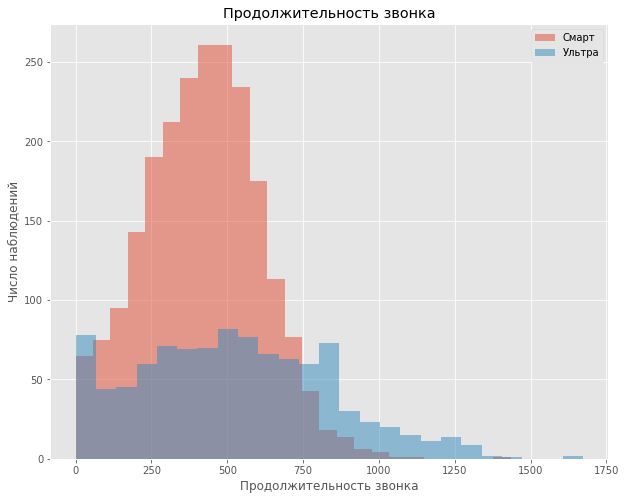

In [151]:
plt.style.use('ggplot')

df_final_with_tariffs.groupby('tariff')['duration'].plot.hist(alpha=0.5, legend=True, bins=25, figsize=(10,8))

plt.legend(['Смарт', 'Ультра'])
plt.title('Продолжительность звонка')
plt.xlabel('Продолжительность звонка')
plt.ylabel('Число наблюдений')

Продолжительность звонка для тарифа смарт:
- Наиболее часто встречается значение в 422 минуты (при ограничении тарифа в 500 минут.
- 754 пользователя (или 33,8% пользователей тарифа) вышли за установленное значение в 500 минут.
- Масимальная продолжительность звонка  - 1435 минут.

Продолжительность звонка для тарифа ультра:
- Наиболее часто встречается значение в 518 минут - из 3000 доступных.
- После 880 минут число пользователей уменьшается.
- Максимальная продолжительность звонка равна 1673 минут, единичные значения дозодят до 1500 минут. 


Данные для тарифа смарт распределены нормально. 

В тарифе ультра наблюдается больший разброс значений, датасет скошен вправо. 
Вероятно, это связано с меньшим количеством выборки. Чем меньше выборка - тем больше данные отклоняются от нормального распределения.


Text(0, 0.5, 'Число наблюдений')

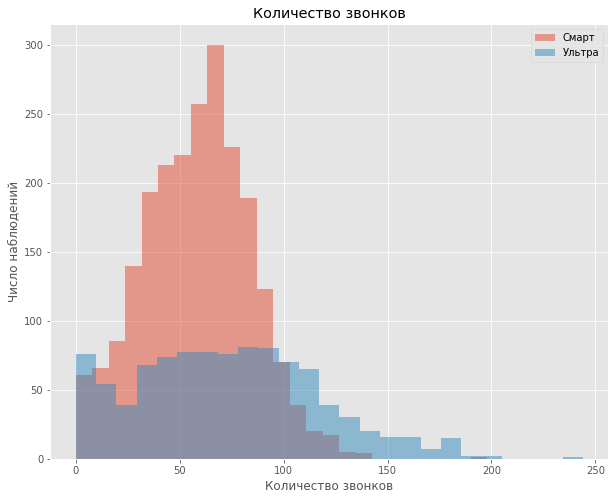

In [152]:
df_final_with_tariffs.groupby('tariff')['number_of_calls'].plot.hist(alpha=0.5, legend=True, bins=25, figsize=(10,8))

plt.legend(['Смарт', 'Ультра'])
plt.title('Количество звонков')
plt.xlabel('Количество звонков')
plt.ylabel('Число наблюдений')


Количество звонков в тарифе смарт:
- Значение, которое встречается чаще всего - 60 звонков

Количество звонков в тарифе ультра:
- Медианное значение - 74 звонка.

Text(0, 0.5, 'Число наблюдений')

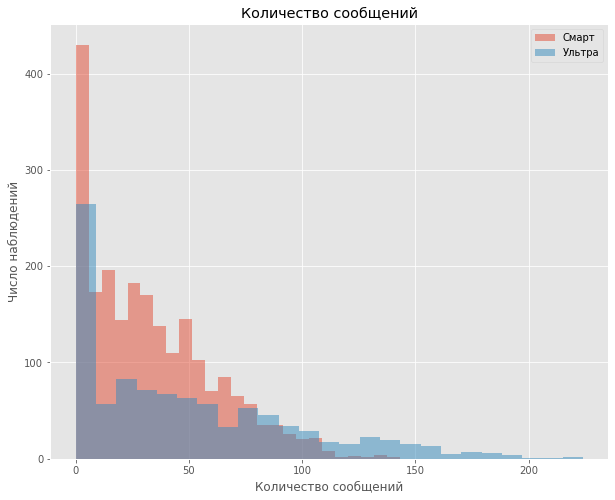

In [153]:
df_final_with_tariffs.groupby('tariff')['number_of_messages'].plot.hist(alpha=0.5, legend=True, bins=25, figsize=(10,8))

plt.legend(['Смарт', 'Ультра'])
plt.title('Количество сообщений')
plt.xlabel('Количество сообщений')
plt.ylabel('Число наблюдений')


Количество  сообщений в тарифе смарт:
- Порядка 430 человек не пользуются сообщениями. 
- 28 сообщений в месяц отправляют пользователи чаще всего(из доступных 50)
- 564 человека превышают тарифный лимит в 50 сообщений
- Максимальное число сообщенией по тарифу - 143


Количество сообщений в тарифе ультра:
- Порядка 270 человек не пользуются сообщениями.
- 38 сообщений в месяц отправляют пользователи чаще всего (из доступных 1000)
- Ни один пользователь не превысил лимит в 1000 сообщений
- Максимальное число сообщений по тарифу - 224

Оба графика скошены вправо, те медиана (наиболее часто встречающееся значение) меньше среднего.

Text(0, 0.5, 'Число наблюдений')

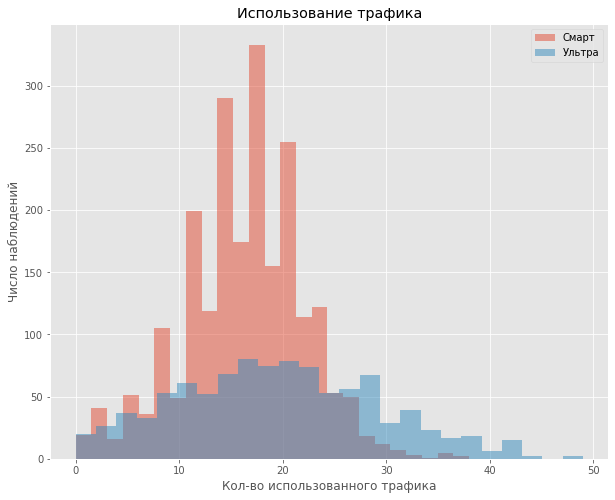

In [154]:
df_final_with_tariffs.groupby('tariff')['mb_used'].plot.hist(alpha=0.5, legend=True, bins=25, figsize=(10,8))

plt.legend(['Смарт', 'Ультра'])
plt.title('Использование трафика')
plt.xlabel('Кол-во использованного трафика')
plt.ylabel('Число наблюдений')

Количество использованного трафика в тарифе смарт:
- Чаще всего пользователи используют 17 Гб интернета при лимите в 15Гб
- Всего 1304 пользователя (или 58%) превысили тарифную норму


Количество использованного трафика в тарифе ультра:
- Чаще всего пользователи используют 19 Гб интернета при лимите в 30Гб
- Превышают норму 134 пользователя или 14%

Text(0, 0.5, 'Число наблюдений')

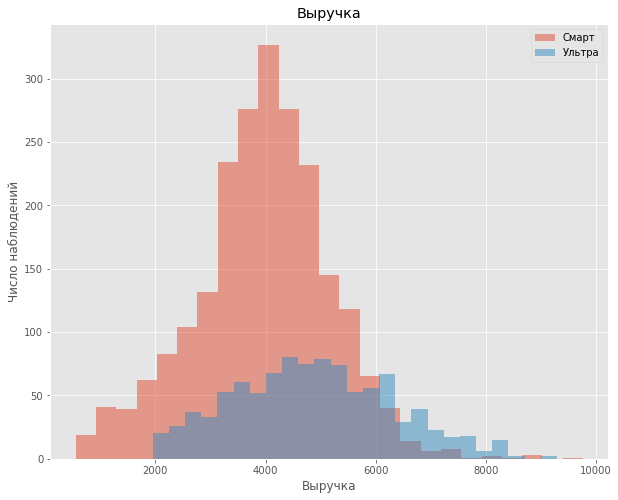

In [155]:
df_final_with_tariffs.groupby('tariff')['proceeds'].plot.hist(alpha=0.5, legend=True, bins=25, figsize=(10,8))

plt.legend(['Смарт', 'Ультра'])
plt.title('Выручка')
plt.xlabel('Выручка')
plt.ylabel('Число наблюдений')


Выручка тарифа ультра с человека выше, чем у тарифа смарт.

Пик у тарифа смарт говорит о том, что большая доля пользователей не выходят за пределы тарифа, то есть не доплачивают.
В то же время, доплат у тарифа смарт больше, чем у тарифа ультра. 

Пользователи тарифа ультра почти не выходят за пределы ежемесячных ограничений = 1950 р/месяц.


In [158]:
smart_proceeds = df_final_with_tariffs.query('tariff == "smart"')['proceeds'].sum()
print('Выручка тарифа смарт', smart_proceeds)

ultra_proceeds = df_final_with_tariffs.query('tariff == "ultra"')['proceeds'].sum()
print('Выручка тарифа ультра', ultra_proceeds)

print()

smart_clients = len(df_final_with_tariffs.query('tariff == "smart"')['user_id'].unique())
print('Пользуются тарифом смарт {} человек'.format(smart_clients))

ultra_clients = len(df_final_with_tariffs.query('tariff == "ultra"')['user_id'].unique())
print('Пользуются тарифом ультра {} человек'.format(ultra_clients))

print()

smart_per_client = smart_proceeds/smart_clients
print(smart_per_client)

ultra_per_client = ultra_proceeds/ultra_clients
print(ultra_per_client)

Выручка тарифа смарт 8817897.0
Выручка тарифа ультра 4797154.0

Пользуются тарифом смарт 350 человек
Пользуются тарифом ультра 148 человек

25193.99142857143
32413.202702702703


Несмотря на разницу в количестве пользователей, тариф ультра приносит ощутимо больше выручки.

## Проверка гипотез

### Гипотеза №1

<b>Проверка гипотезы: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.</b>

Нулевая гипотеза всегда формулируется так, чтобы использовать знак равенства.
Исходя из H₀ формулируется альтернативную гипотезу.


$\begin{equation*}
 \begin{cases}
H_0 :\text{Cредняя выручка тарифов равна.}\\
H_1 :\text{Cредняя выручка тарифов различается.}
 \end{cases}
\end{equation*}$

Для проверки гипотез будем использовать t-тест - статистический тест с использованием распределения Стьюдента.

In [ ]:
proceeds_smart = df_final_with_tariffs.query('tariff == "smart"')['proceeds']

proceeds_ultra = df_final_with_tariffs.query('tariff == "ultra"')['proceeds']

alpha = 0.05

results = st.ttest_ind(proceeds_smart,
                      proceeds_ultra)
                           

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Отвергаем нулевую гипотезу - те средняя выручка тарифов не равна.

### Гипотеза №2

$\begin{equation*}
 \begin{cases}
H_0 :\text{Средняя выручка пользователей из Москвы такая же, как пользователей из регионов.}\\
H_1 :\text{Средняя выручка пользователей из Москвы и регионов разная.}
 \end{cases}
\end{equation*}$

In [ ]:
proceeds_Moscow = df_final_with_tariffs.query('city == "Москва"')['proceeds']

proceeds_region = df_final_with_tariffs.query('city != "Москва"')['proceeds']

alpha = 0.05

results = st.ttest_ind(proceeds_Moscow,
                      proceeds_region)
                           

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Выручка пользователей Москвы и регионов не равна.

## Вывод по проекту

Следует сакцентировать рекламную кампанию на тарифе "ультра".

Несмотя на минимальное количество доплат тариф "ультра" приносит больше денег, чем бюджетный "смарт".
